In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import pickle
from sklearn.model_selection import train_test_split
import dataProcess as dp
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from scipy.ndimage.measurements import label
from skimage.feature import hog

%matplotlib inline


In [4]:
clf = joblib.load('../model/svmCar.pkl')
svc = clf['model']
X_scaler = clf['scaling']
parameter = clf['config']
cspace = parameter['color_space']
spatial_size = parameter['spatial_size']
hist_bins = parameter['hist_bins']
orient = parameter['orient']
pix_per_cell = parameter['pix_per_cell']
cell_per_block = parameter['cell_per_block']
hog_channel = parameter['hog_channel']
spatial_feat = parameter['spatial_feat']
hist_feat = parameter['hist_feat']
hog_feat = parameter['hog_feat']
print(parameter)


{'cell_per_block': 1, 'hog_channel': 'ALL', 'pix_per_cell': 8, 'spatial_feat': True, 'spatial_size': (16, 16), 'color_space': 'YCrCb', 'hog_feat': True, 'orient': 9, 'hist_bins': 16, 'hist_feat': True}


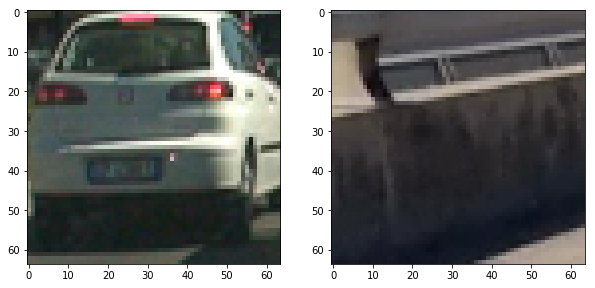

In [5]:
cars, notCars = dp.dataRead('../data/allData.p')
car0 = cars[0]
notCar0 = notCars[0]
fig, imtable = plt.subplots (1, 2, figsize = (10, 10), squeeze=False)
imtable[0][0].imshow(car0)
imtable[0][1].imshow(notCar0)

In [6]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block,vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                    cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                    visualise=vis, feature_vector=feature_vec)
        return features, hog_image
        # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                        cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True,
                        visualise=vis, feature_vector=feature_vec)

In [51]:
def hog_features(img, cspace='RGB', orient=9, pix_per_cell=8, cell_per_block=2, hog_channel='ALL'):
    features = []
    if cspace != 'RGB':
        if cspace == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif cspace == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        elif cspace == 'GRAY':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else: feature_image = np.copy(img)
    f1,hog1 = get_hog_features(feature_image[:,:,0], orient, pix_per_cell, 
                            cell_per_block, vis=True, feature_vec=True)
    f2,hog2 = get_hog_features(feature_image[:,:,1], orient, pix_per_cell, 
                            cell_per_block, vis=True, feature_vec=True)
    f3,hog3 = get_hog_features(feature_image[:,:,2], orient, pix_per_cell, 
                            cell_per_block, vis=True, feature_vec=True)
    return feature_image, hog1, hog2, hog3

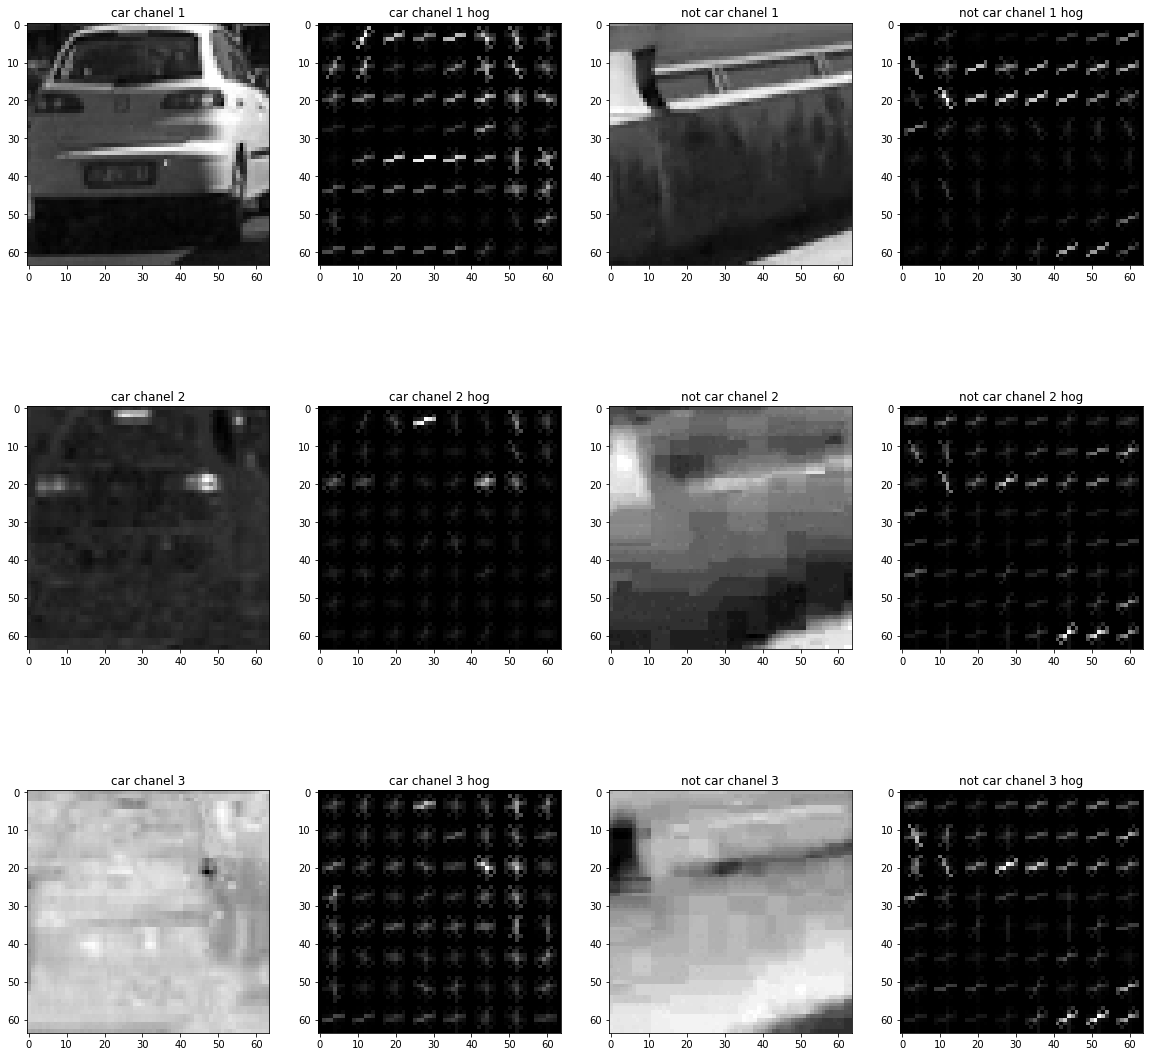

In [55]:
car0Feat,car0Hog1, car0Hog2, car0Hog3 = hog_features(car0, cspace=cspace, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notCar0Feat, notCar0Hog1, notCar0Hog2, notCar0Hog3 = hog_features(notCar0, cspace=cspace, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
fig1, imtable = plt.subplots (3, 4, figsize = (20, 20), squeeze=False)
imtable[0][0].imshow(car0Feat[:,:,0],cmap='gray')
imtable[0][0].set_title('car chanel 1')
imtable[0][1].imshow(car0Hog1,cmap='gray')
imtable[0][1].set_title('car chanel 1 hog')
imtable[1][0].imshow(car0Feat[:,:,1],cmap='gray')
imtable[1][0].set_title('car chanel 2')
imtable[1][1].imshow(car0Hog2,cmap='gray')
imtable[1][1].set_title('car chanel 2 hog')
imtable[2][0].imshow(car0Feat[:,:,2],cmap='gray')
imtable[2][0].set_title('car chanel 3')
imtable[2][1].imshow(car0Hog3,cmap='gray')
imtable[2][1].set_title('car chanel 3 hog')

imtable[0][2].imshow(notCar0Feat[:,:,0],cmap='gray')
imtable[0][2].set_title('not car chanel 1')
imtable[0][3].imshow(notCar0Hog1,cmap='gray')
imtable[0][3].set_title('not car chanel 1 hog')
imtable[1][2].imshow(notCar0Feat[:,:,1],cmap='gray')
imtable[1][2].set_title('not car chanel 2')
imtable[1][3].imshow(notCar0Hog2,cmap='gray')
imtable[1][3].set_title('not car chanel 2 hog')
imtable[2][2].imshow(notCar0Feat[:,:,2],cmap='gray')
imtable[2][2].set_title('not car chanel 3')
imtable[2][3].imshow(notCar0Hog3,cmap='gray')
imtable[2][3].set_title('not car chanel 3 hog')
